In [2]:
#Import the necessary libraries
import pandas as pd
import numpy as np

In [3]:
#Reading the data --> Enter the path of the desired data in quotes
data = pd.read_csv('dummy.csv')

In [4]:
data

,CIF_NO,CODE_GENDER,NAME_EDUCATION_TYPE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,CNT_CHILDREN,OCCUPATION_TYPE,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CREDIT_LIMIT
0,73122693,M,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Laborers,202500.0,-637,0
1,73152323,F,Higher education,N,House / apartment,School,0,Core staff,270000.0,-1188,20000000
2,73171319,M,Secondary / secondary special,Y,House / apartment,Government,0,Laborers,67500.0,-225,4000000
3,73266627,F,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Laborers,135000.0,-3039,60000000
4,73266639,M,Secondary / secondary special,Y,House / apartment,Religion,0,Core staff,121500.0,-3038,5000000
...,...,...,...,...,...,...,...,...,...,...,...
8558,74932789,F,Secondary / secondary special,Y,House / apartment,Self-employed,1,NaN,63000.0,-2791,2000000
8559,74888041,M,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Drivers,225000.0,-7059,0
8560,73546253,F,Secondary / secondary special,N,House / apartment,Business Entity Type 3,0,NaN,247500.0,-1364,4000000
8561,74252323,F,Secondary / secondary special,Y,House / apartment,Self-employed,1,NaN,63000.0,-2791,0


Preprocessing the data to remove null values

In [5]:
import seaborn as sns

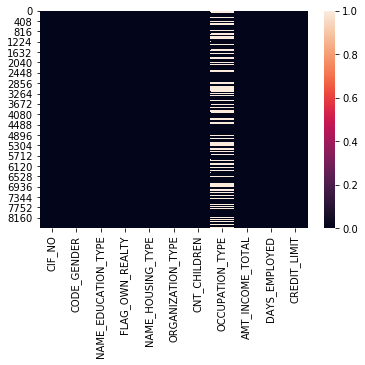

In [6]:
#Checking the plot for any null values in the dataframe
sns.heatmap(data.isnull())

As we see here, all the null values here are in 'OCCUPATION TYPE' column of the data

In [7]:
data.fillna('None',inplace=True)

We need to put categories instead of the categories of each column

In [8]:
data.head()

,CIF_NO,CODE_GENDER,NAME_EDUCATION_TYPE,FLAG_OWN_REALTY,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,CNT_CHILDREN,OCCUPATION_TYPE,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CREDIT_LIMIT
0,73122693,M,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Laborers,202500.0,-637,0
1,73152323,F,Higher education,N,House / apartment,School,0,Core staff,270000.0,-1188,20000000
2,73171319,M,Secondary / secondary special,Y,House / apartment,Government,0,Laborers,67500.0,-225,4000000
3,73266627,F,Secondary / secondary special,Y,House / apartment,Business Entity Type 3,0,Laborers,135000.0,-3039,60000000
4,73266639,M,Secondary / secondary special,Y,House / apartment,Religion,0,Core staff,121500.0,-3038,5000000


As you can see, there is a credit limit assigned here which makes this data applicable to regression problems. 

In [9]:
#One-hot encoding the data

In [10]:
data_encoded = pd.get_dummies(data)

In [11]:
data_encoded.columns

Index(['CIF_NO', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'DAYS_EMPLOYED',
       'CREDIT_LIMIT', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment', 'NAME_HOUSING_TYPE_With parents',
       'ORGANIZATION_TYPE_Advertising', 'ORGANIZATION_TYPE_Agriculture',
       'ORGANIZATION_TYPE_Bank', 'ORGANIZATION_TYPE_Business Entity Type 1',
       'ORGANIZATION_TYPE_Business Entity Type 2',
       'ORGANIZATION_TYPE_Business Entity Type 3',
       'ORGANIZATION_TYPE_Cleaning', 'ORGANIZATION_TYPE_Constru

In [14]:
data_encoded.columns = ["".join(c if c.isalnum() else "_" for c in str(x)) for x in data_encoded.columns]

In [15]:
#importing the necessary libraries for train test splits
from sklearn.model_selection import train_test_split

For this to work, we first need to take X and y properly where:

    X -> features (in this case, data.loc[:,'CIF_NO':'DAYS_EMPLOYED']
    y -> target variable (in this case , data[:,'CREDIT_LIMIT'])

In [16]:
X = data_encoded.loc[:, data_encoded.columns != 'CREDIT_LIMIT']

In [17]:
y = data_encoded.loc[:,'CREDIT_LIMIT']

In [18]:
X

,CIF_NO,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_EMPLOYED,CODE_GENDER_F,CODE_GENDER_M,NAME_EDUCATION_TYPE_Academic_degree,NAME_EDUCATION_TYPE_Higher_education,NAME_EDUCATION_TYPE_Incomplete_higher,NAME_EDUCATION_TYPE_Lower_secondary,...,OCCUPATION_TYPE_Low_skill_Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine_staff,OCCUPATION_TYPE_None,OCCUPATION_TYPE_Private_service_staff,OCCUPATION_TYPE_Realty_agents,OCCUPATION_TYPE_Sales_staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security_staff,OCCUPATION_TYPE_Waiters_barmen_staff
0,73122693,0,202500.0,-637,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,73152323,0,270000.0,-1188,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,73171319,0,67500.0,-225,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,73266627,0,135000.0,-3039,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,73266639,0,121500.0,-3038,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8558,74932789,1,63000.0,-2791,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8559,74888041,0,225000.0,-7059,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8560,73546253,0,247500.0,-1364,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8561,74252323,1,63000.0,-2791,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [19]:
y

0              0
1       20000000
2        4000000
3       60000000
4        5000000
          ...   
8558     2000000
8559           0
8560     4000000
8561           0
8562    20000000
Name: CREDIT_LIMIT, Length: 8563, dtype: int64

In [20]:
#Splitting into train and test : Here you can define your own random state and test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
print('Shape of X_train is {}'.format(X_train.shape))
print('Shape of X_test is {}'.format(X_test.shape))
print('Shape of Y_train is {}'.format(y_train.shape))
print('Shape of Y_test is {}'.format(y_test.shape))

Shape of X_train is (5994, 96)
Shape of X_test is (2569, 96)
Shape of Y_train is (5994,)
Shape of Y_test is (2569,)


Our models will be trained using (X_train,y_train) and will be tested using X_test in the first fit and using X_train in the second fit 

In [49]:
model_name = []
r2_test = []
r2_train = []
rmse_test = []
rmse_train = []

In [50]:
from sklearn.linear_model import LinearRegression,SGDRegressor,LogisticRegression
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor, RandomForestRegressor, BaggingRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from lightgbm.sklearn import LGBMRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_squared_error
from math import sqrt

In [51]:
regressors = [LinearRegression,SGDRegressor,LogisticRegression,VotingRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor, AdaBoostRegressor, DecisionTreeRegressor, SVR, MLPRegressor, LGBMRegressor, XGBRegressor]

In [52]:
regressors_str = ['LinearRegression','SGDRegressor','LogisticRegression','VotingRegressor','GradientBoostingRegressor','RandomForestRegressor','BaggingRegressor','ExtraTreesRegressor', 'AdaBoostRegressor', 'DecisionTreeRegressor', 'SVR', 'MLPRegressor', 'LGBMRegressor', 'XGBRegressor']

In [53]:
i=0
for i in range(0,len(regressors),1):
    try:
        clf = regressors[i]()
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        r2_score_test = r2_score(y_test,y_pred)
        rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_train)
        r2_score_train = r2_score(y_train,y_pred) 
        rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))
    except:
        lf = regressors[i](estimators=10)
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_test)
        r2_score_test = r2_score(y_test,y_pred)
        rmse_score_test = sqrt(mean_squared_error(y_test,y_pred))
        clf.fit(X_train,y_train)
        y_pred = clf.predict(X_train)
        r2_score_train = r2_score(y_train,y_pred) 
        rmse_score_train = sqrt(mean_squared_error(y_train,y_pred))
        pass
    model_name.append(regressors_str[i])
    r2_test.append(r2_score_test)
    rmse_test.append(rmse_score_test)
    r2_train.append(r2_score_train)
    rmse_train.append(rmse_score_train)

C:\Users\Yash\Anaconda3\envs\omdena\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\envs\omdena\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Yash\Anaconda3\envs\omdena\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Yash\Anaconda3\envs\omdena\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Yash\Anaconda3\envs\omdena\lib\site-packages\sklearn\

In [54]:
df_scores = pd.DataFrame()

In [55]:
df_scores['model_name'] = model_name
df_scores['r2_test'] = r2_test
df_scores['r2_train'] = r2_train
df_scores['rmse_test'] = rmse_test
df_scores['rmse_train'] = rmse_train

In [56]:
df_scores 

,model_name,r2_test,r2_train,rmse_test,rmse_train
0,LinearRegression,-2.101629e-02,1.472451e-02,2.569729e+07,2.546136e+07
1,SGDRegressor,-3.507368e+33,-4.880252e+31,1.506127e+24,1.791941e+23
2,LogisticRegression,-6.902296e-01,-6.780197e-01,3.306312e+07,3.322777e+07
3,VotingRegressor,-6.902296e-01,-6.780197e-01,3.306312e+07,3.322777e+07
4,GradientBoostingRegressor,-1.354678e-02,6.807931e-02,2.560312e+07,2.476237e+07
5,RandomForestRegressor,-1.509375e-01,7.880374e-01,2.728329e+07,1.180952e+07
6,BaggingRegressor,-1.928918e-01,7.903346e-01,2.777611e+07,1.174535e+07
7,ExtraTreesRegressor,-3.784527e-01,9.999834e-01,2.985842e+07,1.045351e+05
8,AdaBoostRegressor,-9.300558e-02,-7.798689e-02,2.658778e+07,2.663235e+07
9,DecisionTreeRegressor,-1.002617e+00,1.000000e+00,3.598901e+07,0.000000e+00
